In [1]:
import keras
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data_train = pd.read_csv('train.csv')
data_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
X = data_train.drop('label', axis=1).values
y = data_train['label'].values

# Reshape the images and normalise pixel values to be between 0 and 1
X = X.reshape(-1, 28, 28, 1).astype('float64')
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

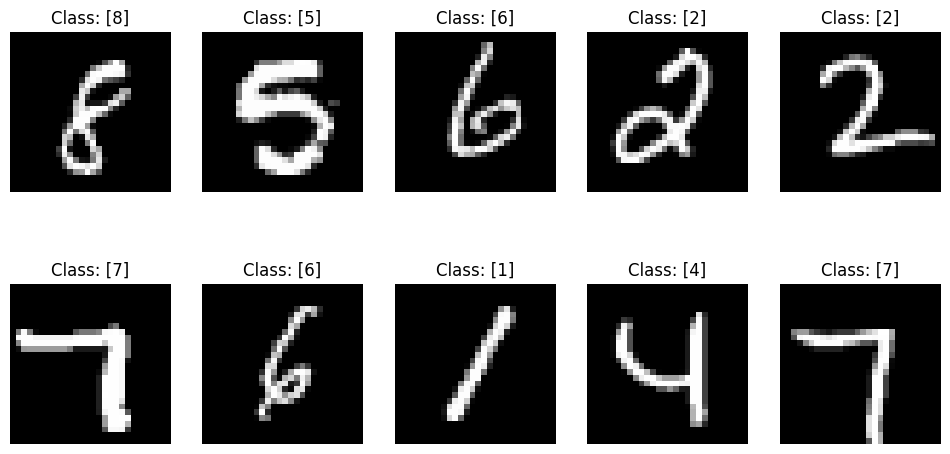

In [4]:
# Display images and corresponding class names
num_rows, num_cols = 2, 5 # Display 2 rows and 5 columns of images
plt.figure(figsize=(12, 6))
for i in range(num_rows * num_cols):
  plt.subplot(num_rows, num_cols, i + 1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f'Class: {[y_train[i]]}')
  plt.axis('off')
plt.show()


In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9905 - val_loss: 0.0384
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9999 - loss: 8.2471e-04 - val_accuracy: 0.9905 - val_loss: 0.0396
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9999 - loss: 5.2284e-04 - val_accuracy: 0.9910 - val_loss: 0.0421
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9999 - loss: 5.7183e-04 - val_accuracy: 0.9912 - val_loss: 0.0411
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9999 - loss: 6.7304e-04 - val_accuracy: 0.9912 - val_loss: 0.0407
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 4.4388e-04 - val_accuracy: 0.9907 - val_loss: 0.0402
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 1.6219e-04 - val_accuracy: 0.9917 - val_loss: 0.0415
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0543
Test Accuracy: 99.10%


In [11]:
# Predictions on the test set
predictions = model.predict(X_test)
# Find indices of correctly and incorrectly classified images
correct_indices = np.where(np.argmax(predictions, axis=1) == np.argmax(y_test,axis=1))[0]
incorrect_indices = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [12]:
data_test = pd.read_csv('test.csv')
print("Dimensions des données de test :", data_test.shape)

Dimensions des données de test : (28000, 784)


In [13]:
X_test = data_test.values
X_test = X_test.reshape(-1, 28, 28, 1).astype('float64')
X_test = X_test / 255.0
print("Dimensions après reshape :", X_test.shape)

Dimensions après reshape : (28000, 28, 28, 1)


In [14]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
print("Nombre de prédictions :", predicted_labels.shape)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Nombre de prédictions : (28000,)


In [15]:
submission = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

In [16]:
submission.to_csv('submission.csv', index=False)

print("Fichier de soumission créé avec succès !")

Fichier de soumission créé avec succès !


In [17]:
print(data_test.shape)
print(submission.shape)

(28000, 784)
(28000, 2)
